# Importing Necessary Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [40]:
df = pd.read_csv('Quality Assessment - Quality Assesment.csv')
df

,Id,Assembly Line,Quantity (lts.),CO2 dissolved,Time limit Crossed
0,1263945,B,1.971072,14.401617,0
1,1828129,B,2.073388,14.137750,0
2,1871804,A,2.019492,14.774384,0
3,1128634,A,2.004422,15.130565,0
4,1848595,B,2.025784,15.756478,0
...,...,...,...,...,...
294,1222073,A,1.974539,14.249096,0
295,1272076,B,1.974851,14.175526,1
296,1520410,B,1.991623,13.460719,0
297,1226204,B,1.935333,12.189065,1


## Data Processing and Analyzing numerical values

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  299 non-null    int64  
 1   Assembly Line       299 non-null    object 
 2   Quantity (lts.)     293 non-null    float64
 3   CO2 dissolved       299 non-null    float64
 4   Time limit Crossed  299 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 11.8+ KB


In [42]:
df.describe()

,Id,Quantity (lts.),CO2 dissolved,Time limit Crossed
count,2.990000e+02,293.000000,299.000000,299.000000
mean,1.506447e+06,1.997992,15.983235,0.180602
std,2.913488e+05,0.048517,15.322285,0.385333
min,1.004988e+06,1.891835,2.253454,0.000000
25%,1.240662e+06,1.968372,13.109196,0.000000
50%,1.520300e+06,1.997947,14.064673,0.000000
75%,1.747329e+06,2.030391,15.139656,0.000000
max,1.999475e+06,2.109917,150.180978,1.000000


In [43]:
df.isna().sum()

Id                    0
Assembly Line         0
Quantity (lts.)       6
CO2 dissolved         0
Time limit Crossed    0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
round(df['Quantity (lts.)'].median(),3)

1.998

In [46]:
round((df['CO2 dissolved'].max() - df['CO2 dissolved'].min()),2)

147.93

## Graphical Analysis

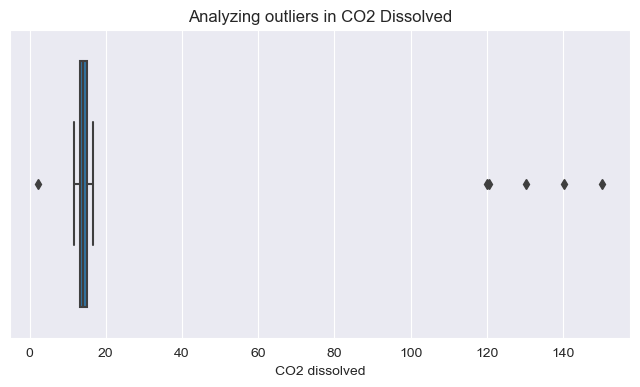

In [47]:
plt.figure(figsize = (8,4))
sns.set_style('darkgrid')
sns.boxplot(x = df['CO2 dissolved'])
plt.title('Analyzing outliers in CO2 Dissolved')
plt.show()

In [48]:
df['Assembly Line'].unique()

array(['B', 'A', 'b', 'a'], dtype=object)

In [49]:
df['Assembly Line'].replace(['a','b'],['A','B'],inplace = True)

In [50]:
df['Assembly Line'].unique()

array(['B', 'A'], dtype=object)

In [51]:
df['Quantity (lts.)'].fillna(df['Quantity (lts.)'].mean(),inplace = True)

In [52]:
df.isna().sum()

Id                    0
Assembly Line         0
Quantity (lts.)       0
CO2 dissolved         0
Time limit Crossed    0
dtype: int64

In [53]:
df['Time limit Crossed'].sum()

54

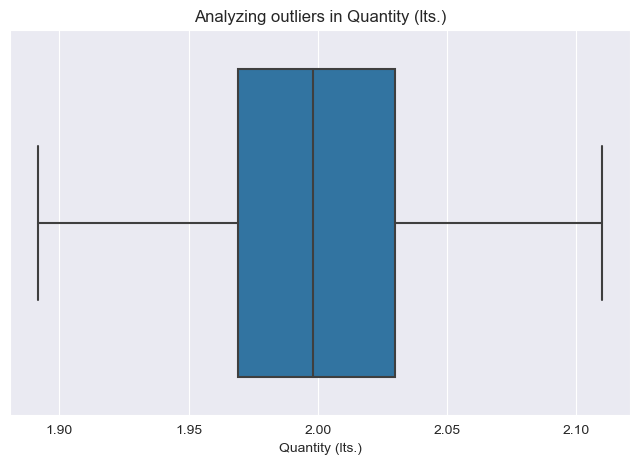

In [54]:
plt.figure(figsize = (8,5))
sns.set_style('darkgrid')
sns.boxplot(x = df['Quantity (lts.)'])
plt.title('Analyzing outliers in Quantity (lts.)')
plt.show()

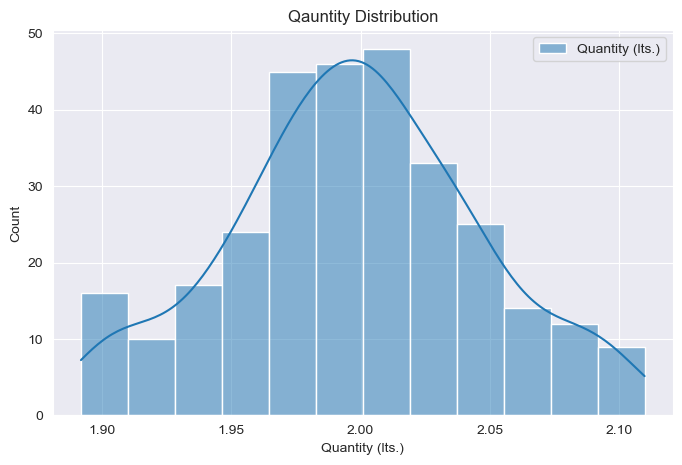

In [55]:
plt.figure(figsize = (8,5))
sns.set_style('darkgrid')
sns.histplot(x = df['Quantity (lts.)'], kde = True, label = 'Quantity (lts.)')
plt.title('Qauntity Distribution')
plt.legend(loc = 'upper right')
plt.show()

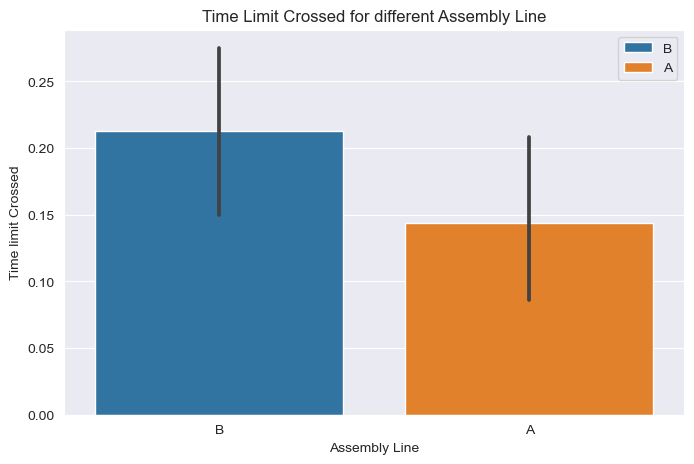

In [67]:
plt.figure(figsize = (8,5))
sns.set_style('darkgrid')
sns.barplot(x = df['Assembly Line'],y = df['Time limit Crossed'],label = ['B','A'])
plt.title('Time Limit Crossed for different Assembly Line')
plt.legend(loc = 'upper right')
plt.show()

## Analyzing the correlation

In [18]:
df.select_dtypes(np.number).corr()

,Id,Quantity (lts.),CO2 dissolved,Time limit Crossed
Id,1.000000,0.030649,-0.058282,-0.089417
Quantity (lts.),0.030649,1.000000,0.046983,-0.027994
CO2 dissolved,-0.058282,0.046983,1.000000,-0.061760
Time limit Crossed,-0.089417,-0.027994,-0.061760,1.000000


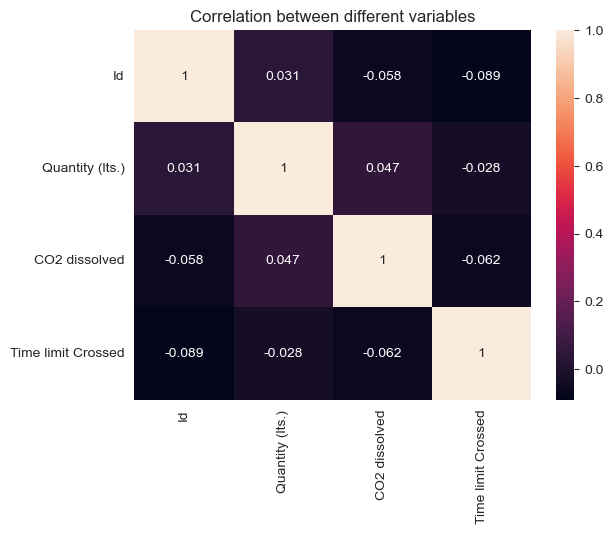

In [66]:
sns.heatmap(df.select_dtypes(np.number).corr(), annot = True)
plt.title('Correlation between different variables')
plt.show()

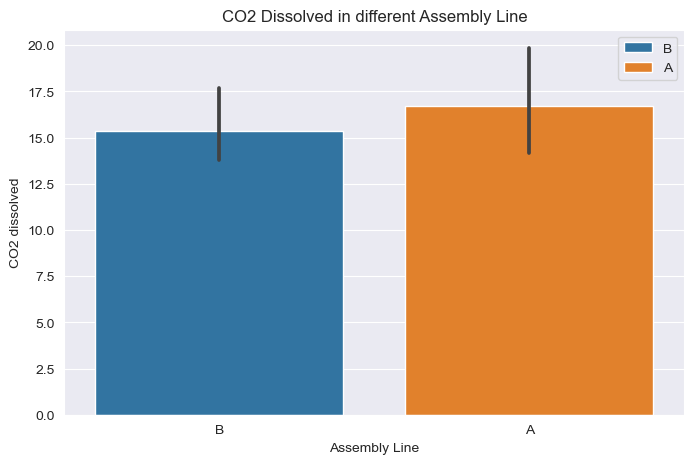

In [69]:
plt.figure(figsize = (8,5))
sns.set_style('darkgrid')
sns.barplot(x = df['Assembly Line'],y = df['CO2 dissolved'], label = ['B','A'])
plt.title('CO2 Dissolved in different Assembly Line')
plt.legend(loc = 'upper right')
plt.show()

In [70]:
df['Assembly Line'].value_counts()

Assembly Line
B    160
A    139
Name: count, dtype: int64

In [71]:
q1 = df['CO2 dissolved'].quantile(0.25)
q3 = df['CO2 dissolved'].quantile(0.75)
iqr = q3 - q1
lower_cutoff = q1-(1.5*iqr)
upper_cutoff = q3+(1.5*iqr)
print(lower_cutoff.round(2))
print(upper_cutoff.round(2))

10.06
18.19


In [72]:
upper_outliers = np.where(df['CO2 dissolved'] >= upper_cutoff)[0]
lower_outliers = np.where(df['CO2 dissolved'] <= lower_cutoff)[0]
df.drop(index = upper_outliers, inplace=True)
df.drop(index = lower_outliers, inplace=True)

In [73]:
df['CO2 dissolved'].mean().round(2)

14.05

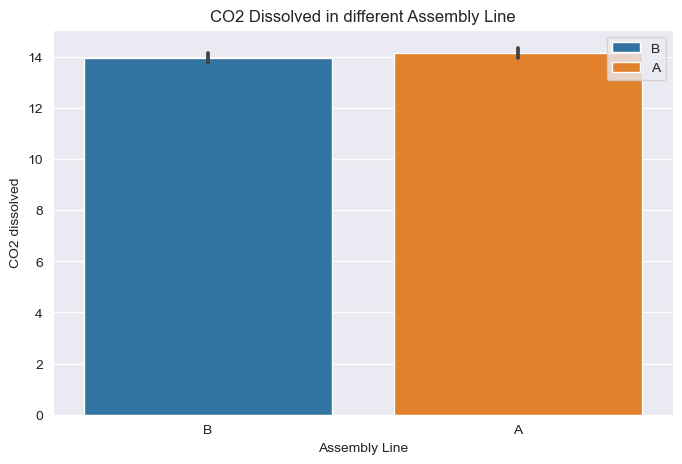

In [74]:
plt.figure(figsize = (8,5))
sns.set_style('darkgrid')
sns.barplot(x = df['Assembly Line'],y = df['CO2 dissolved'], label = ['B','A'])
plt.title('CO2 Dissolved in different Assembly Line')
plt.legend(loc = 'upper right')
plt.show()

In [75]:
df.groupby('Assembly Line').agg({'Time limit Crossed':'sum'})

,Time limit Crossed
Assembly Line,
A,20
B,34


In [76]:
df['Assembly Line'].value_counts()

Assembly Line
B    157
A    136
Name: count, dtype: int64

In [77]:
prob_timeLimitCross_A = round(20/139,2)
prob_timeLimitCross_B = round(34/160,2)
print(prob_timeLimitCross_A)
print(prob_timeLimitCross_B)

0.14
0.21


# Finding binomial prob. distribution

In [78]:
k=10
n=50
prob = stats.binom.pmf(k,n,prob_timeLimitCross_B)
prob.round(2)

0.14

In [79]:
k=10
n=50
prob = stats.binom.pmf(k,n,prob_timeLimitCross_A)
prob.round(2)

0.07

In [80]:
k=9
n=50
prob = 1-stats.binom.cdf(k,n,prob_timeLimitCross_B)
prob.round(2)

0.62

In [81]:
k=9
n=50
prob = 1-stats.binom.cdf(k,n,prob_timeLimitCross_A)
prob.round(2)

0.15

# Treating and removing outliers in quantity

In [82]:
q1 = df['Quantity (lts.)'].quantile(0.25)
q3 = df['Quantity (lts.)'].quantile(0.75)
iqr = q3 - q1
lower_cutoff = q1-(1.5*iqr)
upper_cutoff = q3+(1.5*iqr)
print(lower_cutoff.round(2))
print(upper_cutoff.round(2))

1.88
2.12


In [83]:
upper_outliers = np.where(df['Quantity (lts.)'] >= upper_cutoff)[0]
lower_outliers = np.where(df['Quantity (lts.)'] <= lower_cutoff)[0]
df.drop(index = upper_outliers, inplace=True)
df.drop(index = lower_outliers, inplace=True)

# Finding normal distribution

In [84]:
mean_of_quant = round(np.mean(df['Quantity (lts.)']),2)
mean_of_quant

2.0

In [85]:
std_of_quant = round(np.std(df['Quantity (lts.)']),2)
std_of_quant

0.05

In [86]:
net_content1 = 1.90
z_score = (net_content1 - mean_of_quant)/std_of_quant
prob1 = stats.norm.cdf(z_score)

net_content2 = 2.10
z_score = (net_content2 - mean_of_quant)/std_of_quant
prob2 = stats.norm.cdf(z_score)

In [87]:
round(1-(prob2-prob1),2)

0.05

In [88]:
net_content1 = 1.95
z_score = (net_content1 - mean_of_quant)/std_of_quant
prob1 = stats.norm.cdf(z_score)

net_content2 = 2.05
z_score = (net_content2 - mean_of_quant)/std_of_quant
prob2 = stats.norm.cdf(z_score)

In [89]:
prob2-prob1

0.6826894921370853

# Finding confidence Interval

In [91]:
confidence_level = 0.90
sample_size = df['Quantity (lts.)'].count()

standard_error = std_of_quant/np.sqrt(sample_size)
margin_of_error = stats.t.ppf((1+confidence_level)/2,df=sample_size - 1)*standard_error
print('interval',round((mean_of_quant - margin_of_error),4),round((mean_of_quant + margin_of_error),4))

interval 1.9952 2.0048
